In [1]:
# load dataset
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
# Setelah lo definisiin df dan kolom 'target' nya
import numpy as np
print(np.unique(df['target']))
print(df['target'].dtype)

[0 1 2]
int64


In [3]:
# EDA

print(f'5 Dataset teratas:\n {df.head()}')
print(f'Cek Missing Values:\n {df.isnull().sum()}')
print(f'5 Dataset teratas:\n {df.head()}')

5 Dataset teratas:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  

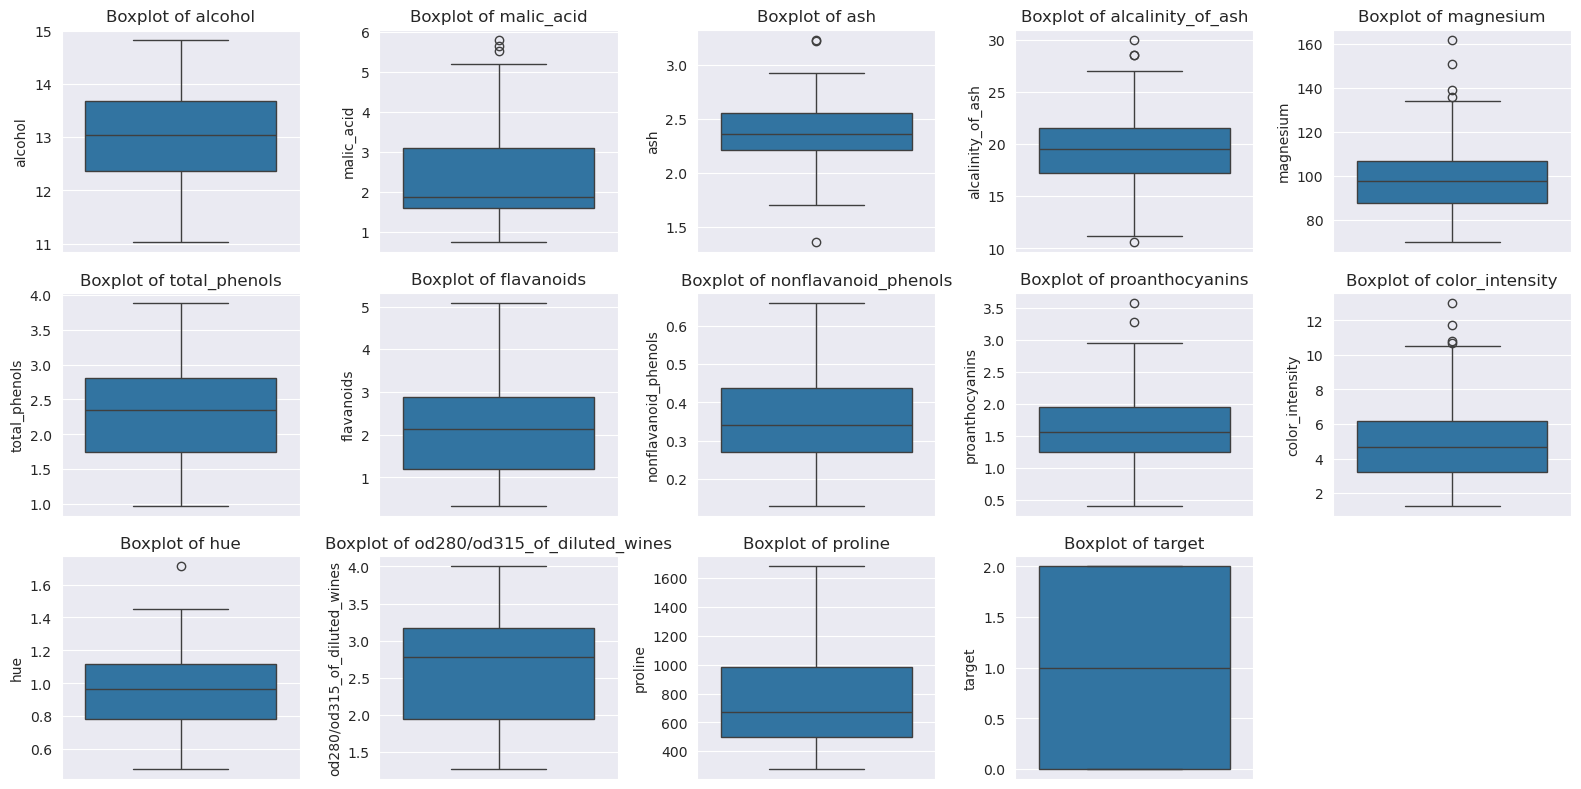

In [4]:
# Cek Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for each feature in the dataframe
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [5]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['target'])
y = df['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Scaling
scaled = MinMaxScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.fit_transform(X_test)

In [6]:
# Bangun model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model
model = RandomForestRegressor(random_state=42)

# fitting
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# evaluasi
# evaluasi
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred):.4f}')

MSE: 0.06839166666666667
R2: 0.8828


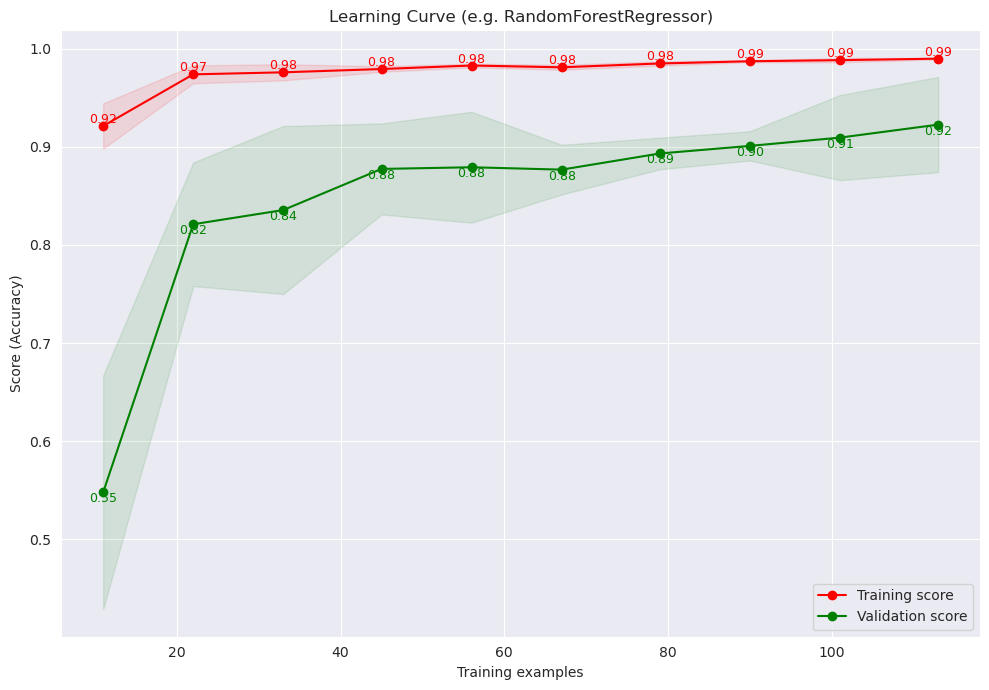

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5,
    scoring='r2',  # GANTI kalau ini buat klasifikasi
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

# Tambahin label angka di titik kurva
for x, y in zip(train_sizes, train_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='r', fontsize=9, ha='center', va='bottom')
for x, y in zip(train_sizes, test_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='g', fontsize=9, ha='center', va='top')

# Setup axis dan tampilan
plt.title("Learning Curve (e.g. RandomForestRegressor)")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


# Because of Overfitting so we continue to the hyperparameter tuning (GridSearchCV)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10,15],
    'min_samples_leaf': [10, 20, 30],
   'max_features': ['sqrt', 'log2', None]
}

model = RandomForestRegressor(random_state=42)

# grid_search
grid_search = GridSearchCV(model, param_dist, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Hasil
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (F1-weighted): {grid_search.best_score_:.4f} \n")

# gunakan model terbaik
best_model = grid_search.best_estimator_

# prediksi model
y_pred_best = best_model.predict(X_test_scaled)

# evaluasi model
print(f'MSE: {mean_squared_error(y_test, y_pred_best)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_best)}')
print(f'R2: {r2_score(y_test, y_pred_best):.4f}')


Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score (F1-weighted): 0.8852 

MSE: 0.058370779109300254
MAE: 0.1330121282872307
R2: 0.8999


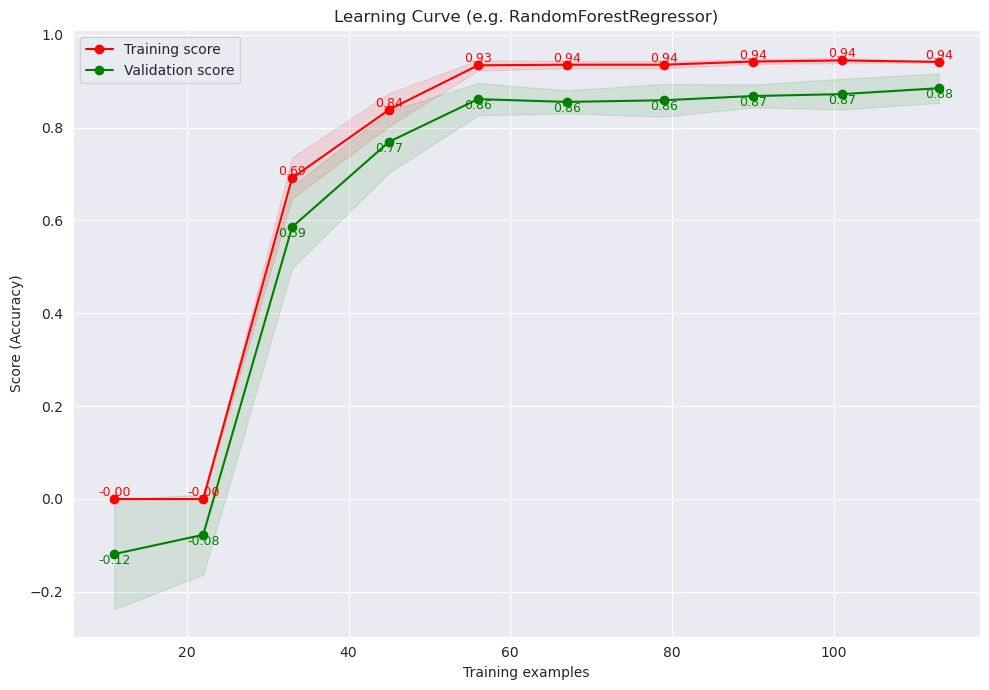

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train,
    cv=5,
    scoring='r2',  # GANTI kalau ini buat klasifikasi
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

# Tambahin label angka di titik kurva
for x, y in zip(train_sizes, train_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='r', fontsize=9, ha='center', va='bottom')
for x, y in zip(train_sizes, test_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='g', fontsize=9, ha='center', va='top')

# Setup axis dan tampilan
plt.title("Learning Curve (e.g. RandomForestRegressor)")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()
